In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import haversine as hv
import numpy as np
from ipywidgets import *
from math import exp

In [2]:
# Read in 
location = pd.read_csv("location.txt", delimiter="\t", names=["longitude","latitude","a","b"])
del location["a"], location["b"]
# From examples_week10.ipynb (IS590DV Class example)

In [3]:
# Tohoku : 142.369, 38.322
Tohoku=(142.369, 38.322)

In [4]:
# Calculate the distances
distance=[]
for row in location.iterrows():
    station = (row[1][0],row[1][1])
    distance.append(hv.haversine(Tohoku,station))

In [5]:
# Add distance column to location DataFrame
location["distance"]=distance

In [6]:
location["order"]=location.index

In [7]:
# Sort by distacnes (acsending)
location = location.sort_values(by=['distance'])

In [8]:
order=list(location["order"])

In [9]:
# Read in detector data
detector=pd.read_csv("/home/mavis22/work/data-readonly/transportable_array/data_tohoku_norm_transpose.csv",names=np.arange(0,438), index_col=False)

In [10]:
ordered_detector = detector[order[0]]
for each in order[1:]:
    ordered_detector = pd.concat([ordered_detector,detector[each]],axis=1)

In [11]:
# Add time range column, from week 10 example
time = pd.date_range("2:46PM", "6:46PM", freq="1s")
time -= time[0]
ordered_detector["time"] = time
ordered_detector.set_index("time", inplace=True)

In [12]:
ordered_detector.head()

,211,193,228,244,194,165,257,151,288,122,...,63,50,121,359,375,242,286,269,304,287
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,-0.001273,0.002861,0.000524,-0.000501,0.000636,0.000501,-0.000090,-0.000892,0.000211,0.000612,...,NaN,-0.000249,-0.000137,0.000077,-0.000191,0.002128,0.000049,0.000025,-0.000400,0.000063
00:00:01,-0.001865,0.003157,0.000142,-0.000291,0.000863,0.000159,-0.000125,-0.001083,0.000425,0.000394,...,NaN,-0.000256,-0.000088,0.000217,0.000294,0.001515,0.000009,-0.000152,0.000151,-0.000126
00:00:02,-0.002425,0.003419,-0.000229,-0.000084,0.001077,-0.000176,-0.000157,-0.001258,0.000629,0.000177,...,NaN,-0.000261,-0.000039,0.000351,0.000764,0.000905,-0.000029,-0.000323,0.000685,-0.000309
00:00:03,-0.002937,0.003642,-0.000577,0.000114,0.001272,-0.000493,-0.000186,-0.001414,0.000818,-0.000030,...,NaN,-0.000263,0.000008,0.000476,0.001206,0.000318,-0.000067,-0.000482,0.001187,-0.000480
00:00:04,-0.003392,0.003827,-0.000895,0.000298,0.001443,-0.000787,-0.000212,-0.001546,0.000985,-0.000221,...,NaN,-0.000263,0.000052,0.000588,0.001610,-0.000232,-0.000103,-0.000627,0.001645,-0.000635


In [13]:
od = ordered_detector.values
od = od.transpose()

In [47]:
# Custom Time Slider
time = widgets.IntSlider(min=0,max=14400, step=1, readout=False)
def out(time):
    hour = time//3600
    time=time-hour*3600
    minute = time//60
    time=time-minute*60
    second = time
    if hour<10:
        hour='0'+str(hour)
    else:
        hour=str(hour)
    if minute<10:
        minute='0'+str(minute)
    else:
        minute=str(minute)
    if second<10:
        second='0'+str(second)
    else:
        second=str(second)
  
    output=hour+":"+minute+":"+second
    print(output)

time_out = widgets.interactive_output(out, {'time':time})

time_slider = widgets.HBox([widgets.HTML(value="00:00:00"), time, time_out])

HBox(children=(HTML(value='00:00:00'), IntSlider(value=0, max=14400, readout=False), Output()))

In [50]:

def make_plot(time:time_slider, num=17):
    Time=time.value
    fig = plt.figure(figsize=(12,8))
    # Plot the detectore on US map
    ax11 = plt.subplot2grid((12,8), (1,0), colspan=4, rowspan=6)
    ax11.scatter(location["longitude"],location["latitude"], c=detector.iloc[Time], cmap="Reds", picker=10)
    # Reference; https://stackoverflow.com/questions/8202605/matplotlib-scatterplot-colour-as-a-function-of-a-third-variable
    ax11.set_title("Visualizing Tohoku Earthquake Detectors")
    ax11.axes.get_xaxis().set_visible(False)
    ax11.axes.get_yaxis().set_visible(False)
    # Reference: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
    ax21 = plt.subplot2grid((12,8), (0,5), colspan=3, rowspan=4)
    plt.imshow(od, aspect='auto', cmap='gray')
    plt.plot([-100,15000],[num, num], 'k-', lw=1)
    plt.plot([Time, Time], [-10, 500], 'k-', lw=1)
    #y 轴坐标从上到下 0：437，需要调整
    ax21.patch.set_visible(False)
    ax21.axis('off')
    ax22 = plt.subplot2grid((12,8), (4,5), colspan=3, rowspan=3)
    ax22.plot(detector[num])
    ax22.set_title(label = "Waveform of Detector No."+str(num))
    plt.show()


# num=[]
# def onpick(event):
#     thisline = event.artist
#     xdata = thisline.get_xdata()
#     ydata = thisline.get_ydata()
#     ind = event.ind
#     num[0]=ind

# cid = fig.canvas.mpl_connect('pick_evet',onpick)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

TypeError: 'HBox' object is not callable

# Test area

In [22]:
Time = ipywidgets.IntSlider(min=0,max=14400,step=1)

In [23]:
Time.get_interact_value

<bound method ValueWidget.get_interact_value of IntSlider(value=0, max=14400)>

In [36]:
help(ipywidgets.HBox)

Help on class HBox in module ipywidgets.widgets.widget_box:

class HBox(Box)
 |  Displays multiple widgets horizontally using the flexible box model.
 |  
 |  Parameters
 |  ----------
 |  children: iterable of Widget instances
 |      list of widgets to display
 |  
 |  box_style: str
 |      one of 'success', 'info', 'warning' or 'danger', or ''.
 |      Applies a predefined style to the box. Defaults to '',
 |      which applies no pre-defined style.
 |  
 |  Examples
 |  --------
 |  >>> import ipywidgets as widgets
 |  >>> title_widget = widgets.HTML('<em>Horizontal Box Example</em>')
 |  >>> slider = widgets.IntSlider()
 |  >>> widgets.HBox([title_widget, slider])
 |  
 |  Method resolution order:
 |      HBox
 |      Box
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.widget_core.CoreWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDesc

<IPython.core.display.Javascript object>


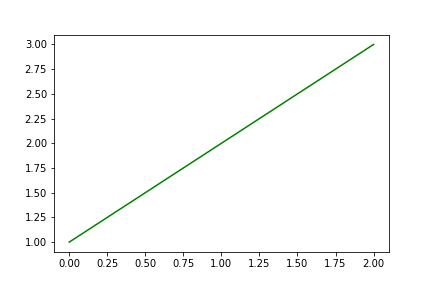

HBox(children=(Button(description='Make Red', style=ButtonStyle()), Button(description='Make Green', style=ButtonStyle())))

In [53]:
%matplotlib notebook
from ipywidgets import HBox, Button
from IPython.display import display
from matplotlib import pyplot as plt

red = Button(description='Make Red')
green = Button(description='Make Green')

fig, ax = plt.subplots()
ax.plot([1,2,3])
plt.show()

def make_red(button):
    ax.lines[0].set_color('red')
    ax.figure.canvas.draw()

def make_green(button):
    ax.lines[0].set_color('green')
    ax.figure.canvas.draw()

red.on_click(make_red )
green.on_click(make_green)
display(HBox([red, green]))